In [ ]:
import sys
python = sys.executable # get python executable path
print(python)

for i in ["numpy",  "scipy", "matplotlib", "pandas", "opencv-python", "opencv-contrib-python"]: # declare what packages we need
  print(f"Installing: {i}")
  ! $python -m pip install $i # install packages calling bash command from the notebook, e.g. "/usr/bin/python -m pip install numpy"

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

/usr/bin/python3
Installing: numpy
Installing: scipy
Installing: matplotlib
Installing: pandas
Installing: opencv-python
Installing: opencv-contrib-python


## Загрузка изображения

In [ ]:
import urllib.request
url = "https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png"
urllib.request.urlretrieve(url, "image.jpg")


('image.jpg', <http.client.HTTPMessage at 0x7f8bee23a690>)

# Задание 1 Чтение и отображение

In [ ]:
import cv2

In [ ]:
img = cv2.imread('image.jpg', cv2.IMREAD_COLOR)

print(img.shape)

(512, 512, 3)


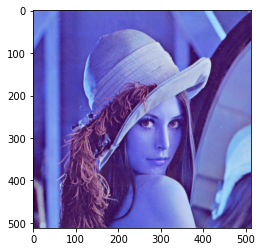

In [ ]:
plt.imshow(img)

In [ ]:
img = img[:,:,::-1]

In [ ]:
print(img)

[[[226 137 125]
  [226 137 125]
  [223 137 133]
  ...
  [230 148 122]
  [221 130 110]
  [200  99  90]]

 [[226 137 125]
  [226 137 125]
  [223 137 133]
  ...
  [230 148 122]
  [221 130 110]
  [200  99  90]]

 [[226 137 125]
  [226 137 125]
  [223 137 133]
  ...
  [230 148 122]
  [221 130 110]
  [200  99  90]]

 ...

 [[ 84  18  60]
  [ 84  18  60]
  [ 92  27  58]
  ...
  [173  73  84]
  [172  68  76]
  [177  62  79]]

 [[ 82  22  57]
  [ 82  22  57]
  [ 96  32  62]
  ...
  [179  70  79]
  [181  71  81]
  [185  74  81]]

 [[ 82  22  57]
  [ 82  22  57]
  [ 96  32  62]
  ...
  [179  70  79]
  [181  71  81]
  [185  74  81]]]


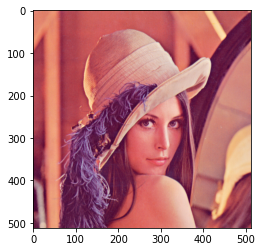

In [ ]:
plt.imshow(img)

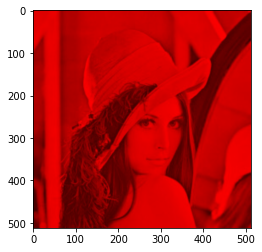

In [ ]:
red_channel = img[:,:,0]
img_red = np.zeros(img.shape)
img_red[:,:,0] = red_channel
cv2.imwrite('image_red.jpg', img_red)
img_red = cv2.imread('image_red.jpg')
plt.imshow(img_red)

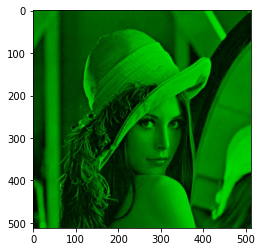

In [ ]:
green_channel = img[:,:,1]
img_green = np.zeros(img.shape)
img_green[:,:,1] = green_channel
cv2.imwrite('image_green.jpg', img_green)
img_green = cv2.imread('image_green.jpg')
plt.imshow(img_green)

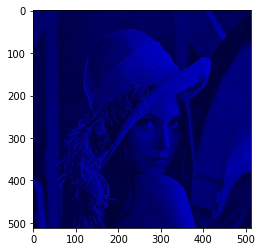

In [ ]:
blue_channel = img[:,:,2]
img_blue = np.zeros(img.shape)
img_blue[:,:,2] = blue_channel
cv2.imwrite('image_blue.jpg', img_blue)
img_blue = cv2.imread('image_blue.jpg')
plt.imshow(img_blue)

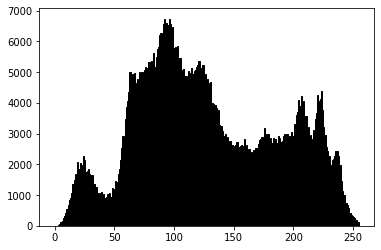

In [ ]:
plt.hist(img.ravel(), bins=256, range=(0, 255), fc='k', ec='k')
plt.show()

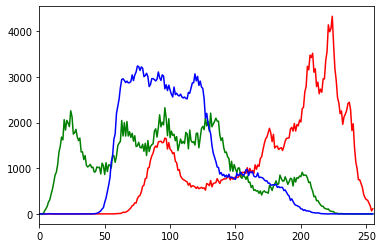

In [ ]:
color = ('r','g','b')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

# Задание 2 Добавление границы

In [ ]:
#Ваш код здесь
def add_border(image, border_size, method):
  if method == 0:
    color = [0, 0, 0]
    img = cv2.copyMakeBorder(image, border_size,border_size,border_size,border_size, cv2.BORDER_CONSTANT, value=color,)
    return img
  elif method == 1:
    img = cv2.copyMakeBorder(image, border_size,border_size,border_size,border_size, cv2.BORDER_REFLECT)
    return img
  elif method == 2:
    img = cv2.copyMakeBorder(image, border_size,border_size,border_size,border_size, cv2.BORDER_REPLICATE)
    return img

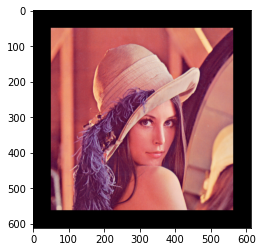

In [ ]:
plt.imshow(add_border(img, 50, 0))

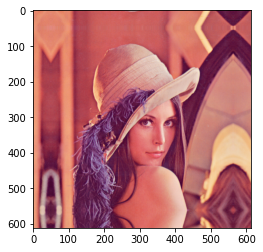

In [ ]:
plt.imshow(add_border(img, 50, 1))

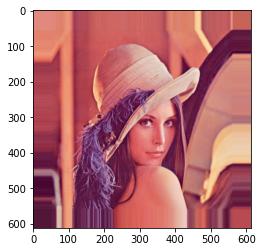

In [ ]:
plt.imshow(add_border(img, 50, 2))

# Задание 3 RGB  -> GRAY

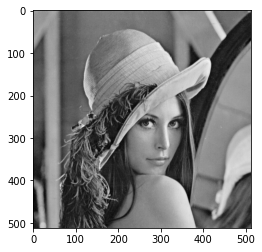

In [ ]:
#Ваш код здесь
def rgb2gray(img):
  img_gray = []
  for i in range(img.shape[0]):
    img_gray.append([])
    for j in range(img.shape[1]):
      img_gray[i].append(sum(img[i][j]))
  return img_gray

img_1 = rgb2gray(img)
plt.imshow(img_1, cmap='gray')

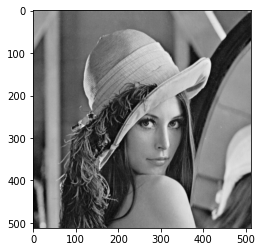

In [ ]:
def rgb2gray_1(img):
  img_gray = []
  for i in range(img.shape[0]):
    img_gray.append([])
    for j in range(img.shape[1]):
      img_gray[i].append(0.299 * img[i][j][0] + 0.587 * img[i][j][1] + 0.114 * img[i][j][2])
  return img_gray

img_1 = rgb2gray_1(img)
plt.imshow(img_1, cmap = 'gray')

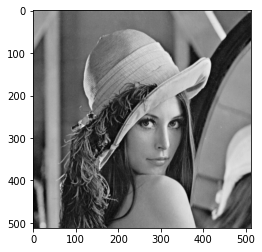

In [ ]:
img_1 = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(img_1, cmap = 'gray')

# Задание 4 Манипуляция с пикселями

In [ ]:
#Ваш код здесь
def shift_image(image, channel, val):
  img_1 = image.copy()
  img_1[:,:,channel] = val * image[:,:,channel]
  return img_1

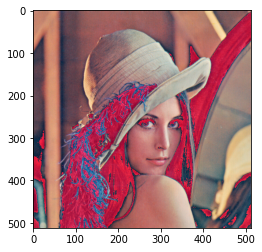

In [ ]:
img_shift = shift_image(img, 0, 2)
plt.imshow(img_shift)

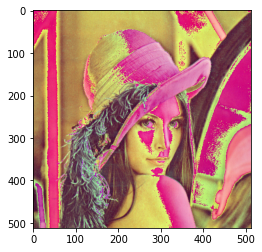

In [ ]:
img_shift = shift_image(img, 1, 2)
plt.imshow(img_shift)

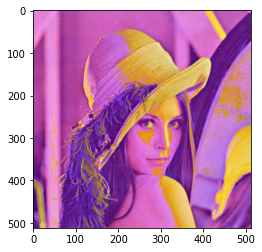

In [ ]:
img_shift = shift_image(img, 2, 2)
plt.imshow(img_shift)

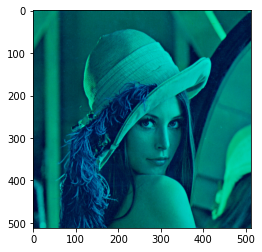

In [ ]:
img_shift = shift_image(img, 0, 0)
plt.imshow(img_shift)

In [ ]:
def get_rect(image, rect_coord, color):
  img = image.copy()
  for i in range(rect_coord[0], rect_coord[2]):
    for j in range(rect_coord[1], rect_coord[3]):
      img[i][j] = color
  return img

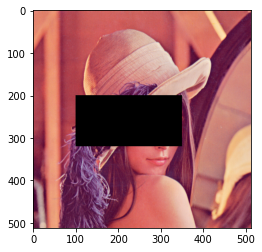

In [ ]:
img_rect = get_rect(img, [200, 100, 320, 350], [0, 0, 0])
plt.imshow(img_rect)

# Задание 5 RGB -> HSV

In [ ]:
#Ваш код здесь
img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

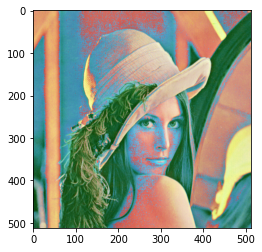

In [ ]:
img_hsv_shift = shift_image(img_hsv, 0, 2)
img_rgb  = cv2.cvtColor(img_hsv_shift, cv2.COLOR_HSV2RGB)
plt.imshow(img_rgb)

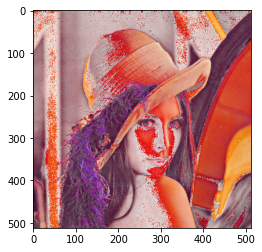

In [ ]:
img_hsv_shift = shift_image(img_hsv, 1, 2)
img_rgb  = cv2.cvtColor(img_hsv_shift, cv2.COLOR_HSV2RGB)
plt.imshow(img_rgb)

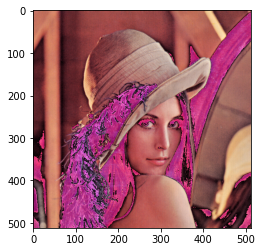

In [ ]:
img_hsv_shift = shift_image(img_hsv, 2, 2)
img_rgb  = cv2.cvtColor(img_hsv_shift, cv2.COLOR_HSV2RGB)
plt.imshow(img_rgb)